In [1]:
#This is the notebook for ML_Ex7_1: k-means clustering

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize as opt
import scipy.io
import random
from sklearn import svm
from nltk.stem import PorterStemmer


In [276]:
def findClosestCentroids(X, initial_centroids):
    idices = np.zeros(X.shape[0])
    for x_idx, x in enumerate(X):
        dist=[]
        for idx, centroid in enumerate(initial_centroids):
            dist.append(np.linalg.norm(x-centroid))
        idices[x_idx] = np.argmin(dist)
    return idices

In [93]:
def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        X_sub = X[idx==k]
        centroids[k,0] = X_sub[:, 0].sum()/len( X_sub[:, 0])
        centroids[k,1] = X_sub[:, 1].sum()/len( X_sub[:, 1])
    return centroids


In [153]:
def plotProgresskMeans(centroids, previous_centroids):
    centroids_x = centroids[:, 0]
    centroids_y = centroids[:, 1]
    previous_centroids_x = previous_centroids[:, 0]
    previous_centroids_y = previous_centroids[:, 1]
    plt.scatter(centroids_x, centroids_y, marker='x', color='r')
    plt.plot([centroids_x, previous_centroids_x], [centroids_y, previous_centroids_y], marker='x', color='r')
    return 0

In [280]:
def runkMeans(X, initial_centroids, max_iter, plot):
    centroids = initial_centroids
    previous_centroids = initial_centroids
    x_ref = X[:, 0]
    y_ref = X[:, 1]
    if plot:
        plt.scatter(x_ref, y_ref)
    K = initial_centroids.shape[0]
    for i in range(max_iter):
        idices = findClosestCentroids(X, centroids)
        if plot:
            plotProgresskMeans(centroids, previous_centroids)
        previous_centroids = centroids
        centroids = computeCentroids(X, idices, K)
    centroids_x = centroids[:, 0]
    centroids_y = centroids[:, 1]
    if plot:
        plt.scatter(centroids_x, centroids_y, marker='x', s=1000, color='k')
        plt.title('iteration number: ' + str(max_iter))
        plt.show()
        print(centroids)
    return centroids, idices

In [371]:
#InputData image & weights
input_data = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex7\machine-learning-ex7\ex7\ex7data2.mat")
X = input_data['X']
initial_centroids = np.array(([3, 3],[6,2],[8,5]))

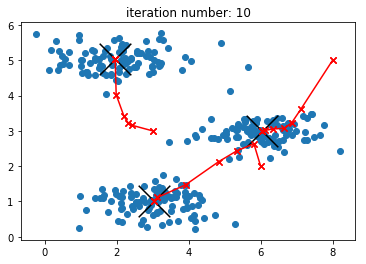

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [372]:
centroids, idx = runkMeans(X, initial_centroids, 10, 1)

In [373]:
def kMeansInitCentroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        idx = random.randint(0,X.shape[0])
        centroids[i] = X[idx]
    return centroids

In [374]:
InitCentroids = kMeansInitCentroids(X, 3)
print(InitCentroids)

[[3.41156277 1.1596363 ]
 [2.04974595 5.6241395 ]
 [2.55983064 5.26397756]]


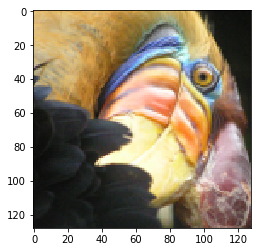

In [375]:
bird = plt.imread(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex7\machine-learning-ex7\ex7\bird_small.png")
plt.imshow(bird)

In [376]:
X = bird.reshape(128*128,3)
X = X/255

In [377]:
InitCentroids = kMeansInitCentroids(X, 16)
centroids, idx = runkMeans(X, InitCentroids, 10, 0)
idices = findClosestCentroids(X, centroids)

In [378]:
recover=np.array(())
for idx in idices:
    recover = np.append(recover,centroids[int(idx)],axis=0)

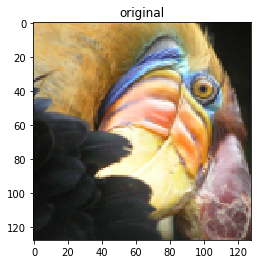

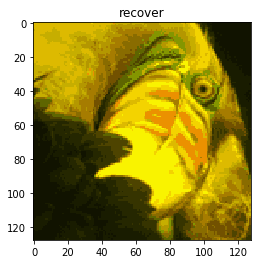

In [380]:
recover = recover.reshape(128,128,3)
plt.imshow(bird)
plt.title('original')
plt.show()
plt.title('recover')
plt.imshow(recover*255)